In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [193]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/content/drive/MyDrive/diplomado/aprendizaje_supervizado/bank_marketing_RETO_DS_AS.csv")

In [194]:
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [196]:
columnascategoricas = ['job', 'poutcome', 'contact','education', 'month']
encondercartegorico = OneHotEncoder().fit(data[columnascategoricas])
dataenc=encondercartegorico.transform(data[columnascategoricas]).toarray()

columnas_expandidas = [f"categoricas_{col}" for col in encondercartegorico.get_feature_names_out(columnascategoricas)]

encondercartegorico_df = pd.DataFrame(dataenc, columns=columnas_expandidas)

data = pd.concat([data.drop(columns=columnascategoricas), encondercartegorico_df], axis=1)
data

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,categoricas_job_admin.,categoricas_job_blue-collar,categoricas_job_entrepreneur,categoricas_job_housemaid,categoricas_job_management,categoricas_job_retired,categoricas_job_self-employed,categoricas_job_services,categoricas_job_student,categoricas_job_technician,categoricas_job_unemployed,categoricas_job_unknown,categoricas_poutcome_failure,categoricas_poutcome_other,categoricas_poutcome_success,categoricas_poutcome_unknown,categoricas_contact_cellular,categoricas_contact_telephone,categoricas_contact_unknown,categoricas_education_primary,categoricas_education_secondary,categoricas_education_tertiary,categoricas_education_unknown,categoricas_month_apr,categoricas_month_aug,categoricas_month_dec,categoricas_month_feb,categoricas_month_jan,categoricas_month_jul,categoricas_month_jun,categoricas_month_mar,categoricas_month_may,categoricas_month_nov,categoricas_month_oct,categoricas_month_sep
0,31,married,no,2666,no,no,10,318,2,97,6,yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,single,no,1584,no,no,6,245,1,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,married,no,2152,yes,no,17,369,1,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,50,married,no,84,yes,no,17,18,8,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40,married,no,0,no,no,28,496,2,182,11,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,married,no,314,yes,yes,16,269,2,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8996,32,married,no,491,yes,no,8,223,2,-1,0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8997,44,single,no,2886,no,no,20,31,1,-1,0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8998,57,married,no,491,yes,no,15,1217,3,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
columnascategoricas1 = ['marital','y','housing','loan','default']
label_encoder = LabelEncoder()

for col in columnascategoricas1:
    data[col] = label_encoder.fit_transform(data[col])
data

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,categoricas_job_admin.,categoricas_job_blue-collar,categoricas_job_entrepreneur,categoricas_job_housemaid,categoricas_job_management,categoricas_job_retired,categoricas_job_self-employed,categoricas_job_services,categoricas_job_student,categoricas_job_technician,categoricas_job_unemployed,categoricas_job_unknown,categoricas_poutcome_failure,categoricas_poutcome_other,categoricas_poutcome_success,categoricas_poutcome_unknown,categoricas_contact_cellular,categoricas_contact_telephone,categoricas_contact_unknown,categoricas_education_primary,categoricas_education_secondary,categoricas_education_tertiary,categoricas_education_unknown,categoricas_month_apr,categoricas_month_aug,categoricas_month_dec,categoricas_month_feb,categoricas_month_jan,categoricas_month_jul,categoricas_month_jun,categoricas_month_mar,categoricas_month_may,categoricas_month_nov,categoricas_month_oct,categoricas_month_sep
0,31,1,0,2666,0,0,10,318,2,97,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,2,0,1584,0,0,6,245,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1,0,2152,1,0,17,369,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,50,1,0,84,1,0,17,18,8,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40,1,0,0,0,0,28,496,2,182,11,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,1,0,314,1,1,16,269,2,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8996,32,1,0,491,1,0,8,223,2,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8997,44,2,0,2886,0,0,20,31,1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8998,57,1,0,491,1,0,15,1217,3,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


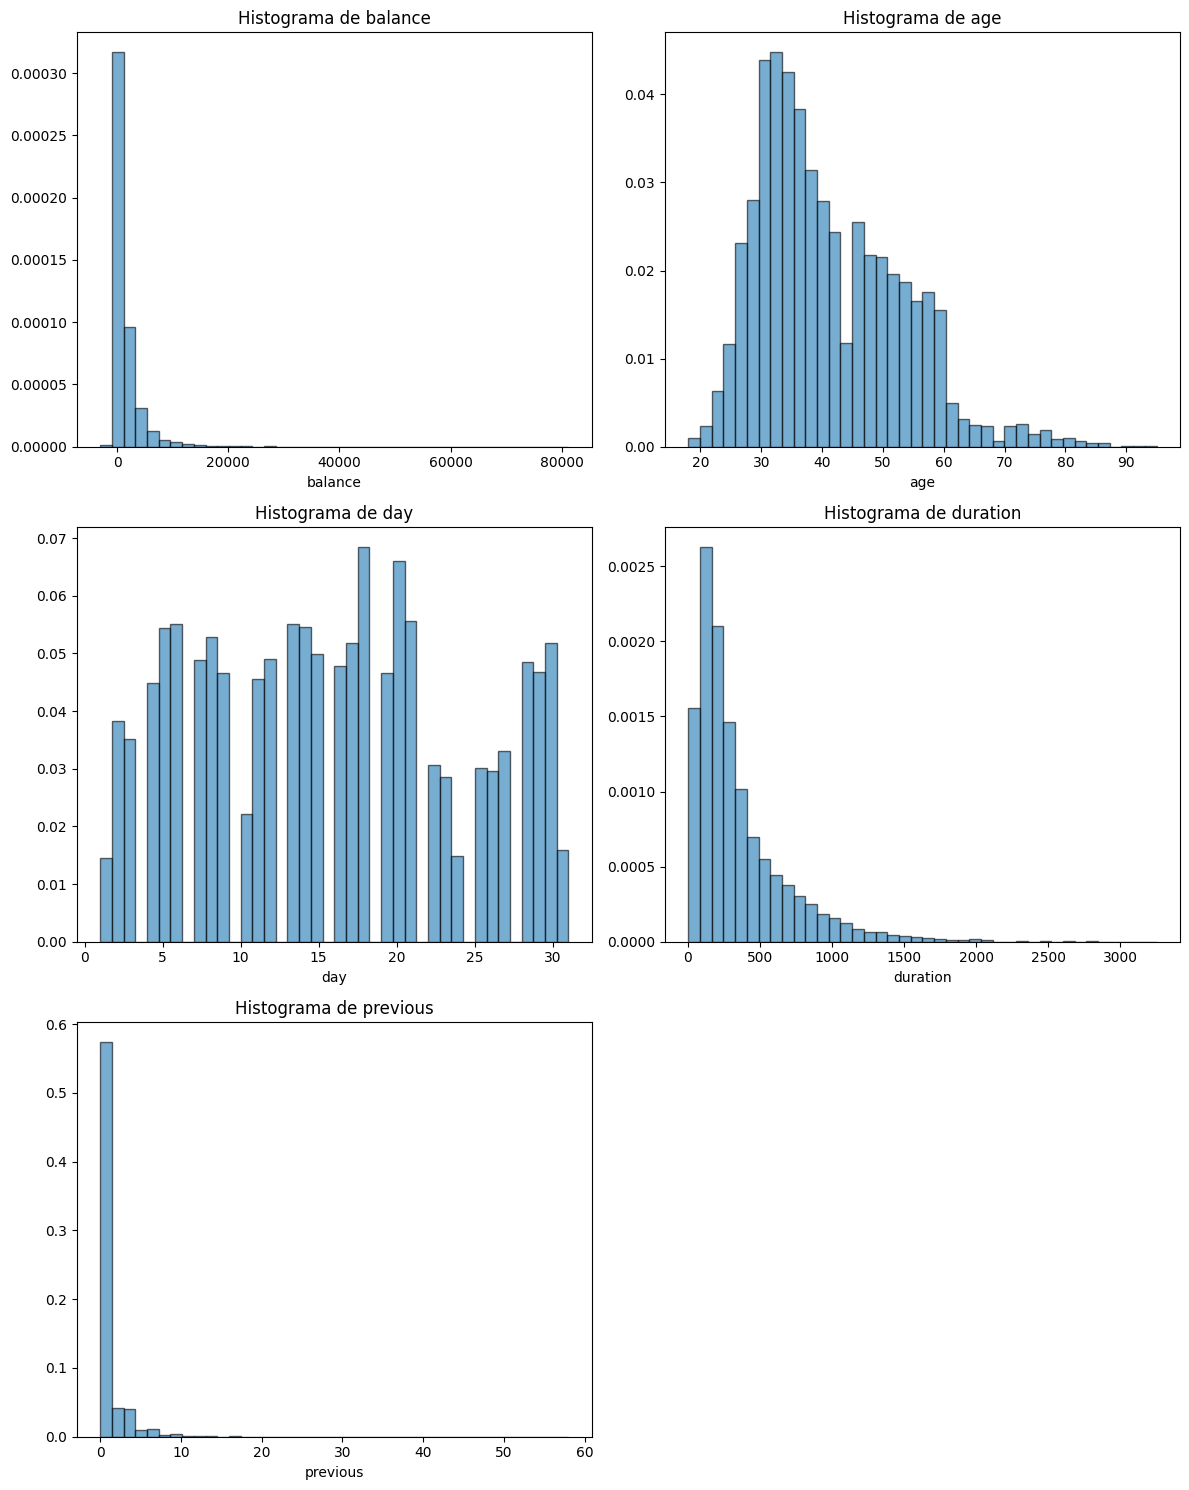

In [198]:
plots = ['balance', 'age', 'day', 'duration', 'previous']

num_cols = len(plots)
num_rows = math.ceil(num_cols / 2)


fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(plots):
    axes[i].hist(data[column], bins=40, edgecolor='black', density=True, alpha=0.6)


    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

En esta parte es conveniente desplegar esquemas de las variables númericas para visualizar si estas tienen sesgo y poder realizar el proceso necesario. En este caso, se observa que algunas de ellas presentan un sesgo positivo

In [199]:
def fun1(X, col_name):
    prom = data[col_name].mean()
    return np.log(np.where((X == -1) | (X == 0), prom, X) + 1)

In [200]:
sesgopositivo=['age','duration','pdays']
for col in sesgopositivo:
    data[col] = data[col].apply(lambda x: fun1(x, col))


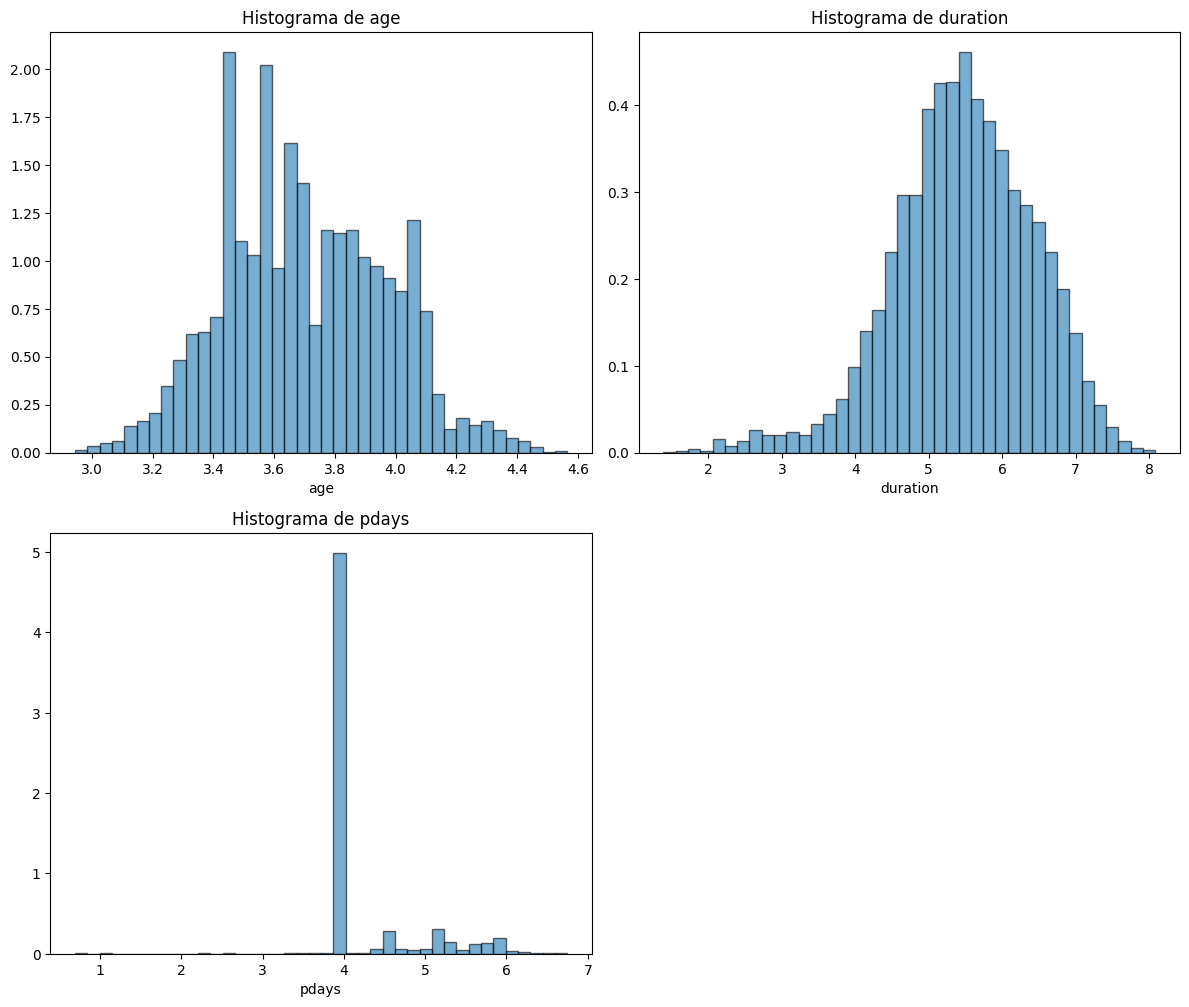

In [201]:

num_cols = data.shape[1]
num_rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))
axes = axes.flatten()
for i, column in enumerate(sesgopositivo):

    axes[i].hist(data[column], bins=40, edgecolor='black', density=True, alpha=0.6)

    #sns.kdeplot(data[column], ax=axes[i], color='red', linewidth=2)

    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

se despliegan estos esquemas para verificar que el sesgo que tenían las variables anteriormente vistas se haya corregido con las transformaciones que se realizarón

In [202]:
y = data['y']
x = data.drop(columns=['y'])

In [203]:
X = x.values
Y = y.values

In [204]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4,random_state=24)

In [205]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=24)  # 20% validación y 20% prueba


In [206]:
print("Dimensión X_train_set:\t\t", X_train.shape)
print("Dimensión X_validation_set:\t", X_val.shape)
print("Dimension X_test_set:\t\t", X_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validation:\t\t", y_val.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 46)
Dimensión X_validation_set:	 (1800, 46)
Dimension X_test_set:		 (1800, 46)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


In [270]:
clf = make_pipeline(StandardScaler(), LogisticRegression( C=0.001, solver='lbfgs',random_state=12, max_iter=1500 ))
modelo_RL = clf.fit( X_train, y_train )

In [271]:
yvalpred = modelo_RL.predict(X_train)

In [272]:
print("Exactitud (accuracy) con el conjunto de Validación = ", modelo_RL.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.8098148148148148


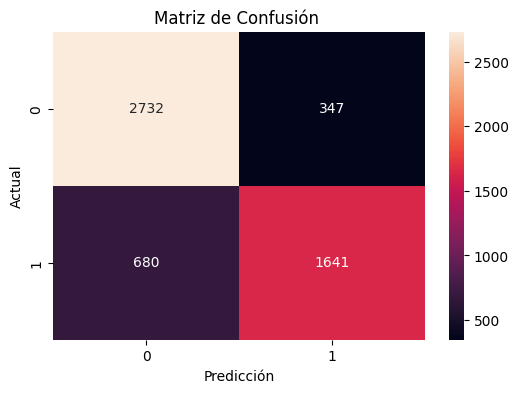

In [273]:
conf_matrix = confusion_matrix(y_train, yvalpred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()


In [298]:
clf1=  make_pipeline(StandardScaler(), LogisticRegression( C=100, solver='lbfgs',random_state=50, max_iter=10000 ))
modelo_RL1= clf1.fit( X_train, y_train )

In [299]:
yvalpred1 = modelo_RL1.predict(X_train)

In [300]:
print("Exactitud (accuracy) con el conjunto de Validación = ", modelo_RL1.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.8277777777777777


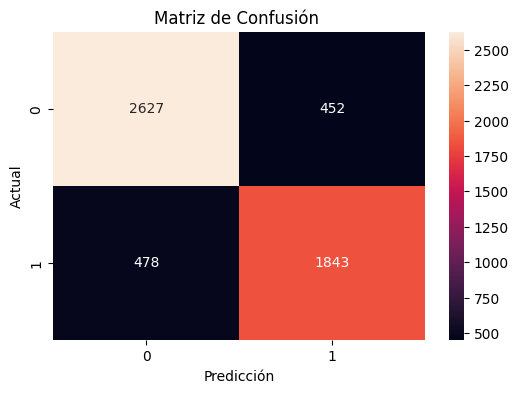

In [301]:
conf_matrix = confusion_matrix(y_train, yvalpred1)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()


In [308]:
nn_model = MLPClassifier(hidden_layer_sizes=(5,3), random_state=11, max_iter=5000)
nn_model.fit(X_train, y_train)

yvalprednn = nn_model.predict(X_train)

In [309]:
print("Exactitud (accuracy) con el conjunto de Validación = ", nn_model.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.8133333333333334


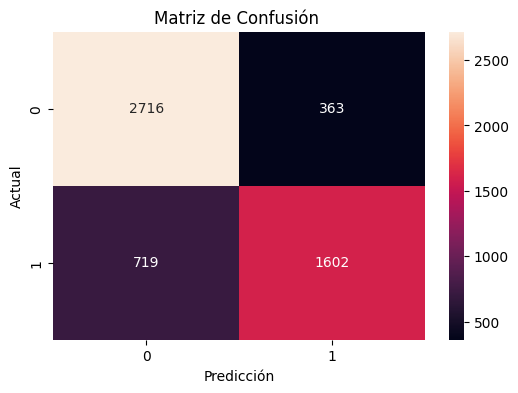

In [219]:
conf_matrixnn = confusion_matrix(y_train, yvalprednn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixnn, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()



In [393]:

nn_model1 = MLPClassifier(hidden_layer_sizes=(5,10), random_state=18, max_iter=7000)
nn_model1.fit(X_train, y_train)

yvalprednn1 = nn_model1.predict(X_train)

In [394]:
print("Exactitud (accuracy) con el conjunto de Validación = ", nn_model1.score(X_train, y_train))

Exactitud (accuracy) con el conjunto de Validación =  0.8214814814814815


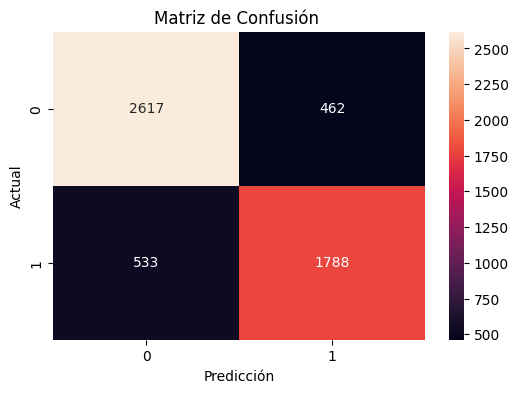

In [222]:
conf_matrixnn = confusion_matrix(y_train, yvalprednn1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixnn, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()


In [302]:
clffin= make_pipeline(StandardScaler(),  LogisticRegression( C=0.001, solver='lbfgs',random_state=12, max_iter=100000 ))
modelo_RLfin= clffin.fit( X_train, y_train )

In [303]:
yvalpredfin = modelo_RLfin.predict(X_test)

In [304]:
print("Exactitud (accuracy) con el conjunto de Validación = ", modelo_RLfin.score(X_test, y_test))

Exactitud (accuracy) con el conjunto de Validación =  0.8211111111111111


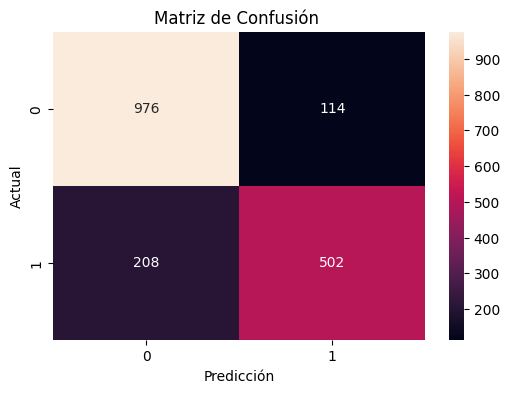

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1090
           1       0.81      0.71      0.76       710

    accuracy                           0.82      1800
   macro avg       0.82      0.80      0.81      1800
weighted avg       0.82      0.82      0.82      1800



In [305]:
conf_matrixfin = confusion_matrix(y_test, yvalpredfin)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrixfin, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión ')
plt.show()

print("Reporte de Clasificación:")
print(classification_report(y_test, yvalpredfin))